In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
currency = pd.read_csv('../datasets/multivariate/currency.csv', index_col=['Time'], parse_dates=['Time'])

In [3]:
currency.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


In [4]:
currency.shape

(300, 1)

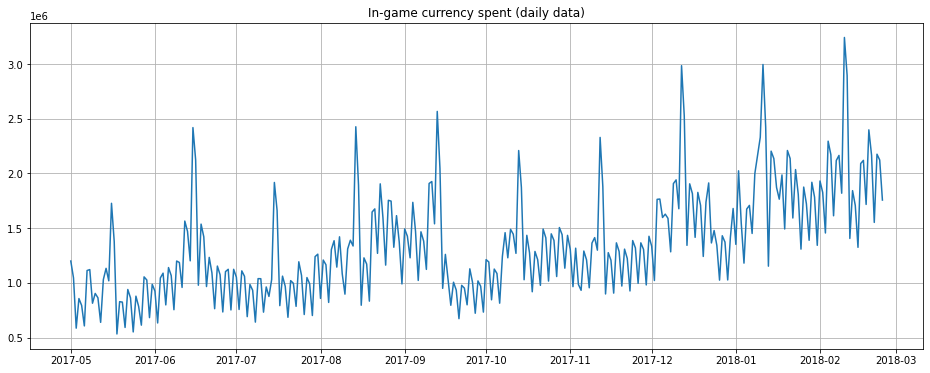

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

# Feature Engineering


## Date Features

Extract: day, weekdays, isweekend, and lags value

In [6]:
currency_features = currency.copy()
currency_features.columns = ['y']

In [7]:
currency_features['day'] = currency_features.index.day
currency_features['weekday'] = currency_features.index.weekday
currency_features['is_weekend'] = 0

currency_features.loc[currency_features.weekday >= 5, 'is_weekend'] = 1

In [8]:
currency_features.head(8)

,y,day,weekday,is_weekend
Time,,,,
2017-05-01,1199436,1,0,0
2017-05-02,1045515,2,1,0
2017-05-03,586111,3,2,0
2017-05-04,856601,4,3,0
2017-05-05,793775,5,4,0
2017-05-06,606535,6,5,1
2017-05-07,1112763,7,6,1
2017-05-08,1121218,8,0,0


## Target Encoding

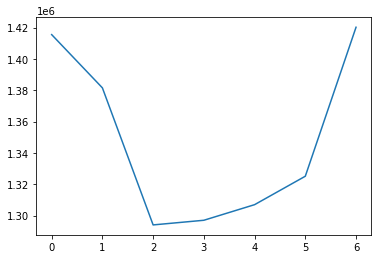

In [9]:
weekday_mean = currency_features.groupby('weekday')['y'].mean()
plt.plot(weekday_mean)

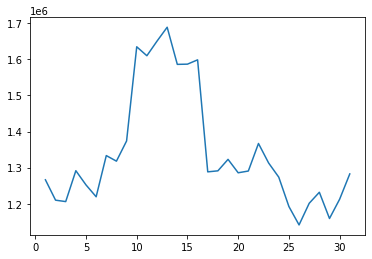

In [10]:
day_mean = currency_features.groupby('day')['y'].mean()
plt.plot(day_mean)

In [11]:
currency_features['weekday_mean'] = currency_features['weekday'].map(lambda x: dict(weekday_mean)[x])
currency_features['day_mean'] = currency_features['day'].map(lambda x: dict(day_mean)[x])

In [12]:
currency_features.head()

,y,day,weekday,is_weekend,weekday_mean,day_mean
Time,,,,,,
2017-05-01,1199436,1,0,0,1.415489e+06,1266254.4
2017-05-02,1045515,2,1,0,1.381505e+06,1209799.7
2017-05-03,586111,3,2,0,1.294029e+06,1205868.0
2017-05-04,856601,4,3,0,1.296998e+06,1291442.2
2017-05-05,793775,5,4,0,1.306952e+06,1252058.9


## Onehot Encoded Features

In [13]:
weekday_onehot = pd.get_dummies(currency_features['weekday'], prefix='weekday')
currency_features = pd.concat([currency_features, weekday_onehot], axis=1)

In [14]:
currency_features

,y,day,weekday,is_weekend,weekday_mean,day_mean,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
Time,,,,,,,,,,,,,
2017-05-01,1199436,1,0,0,1.415489e+06,1266254.4,1,0,0,0,0,0,0
2017-05-02,1045515,2,1,0,1.381505e+06,1209799.7,0,1,0,0,0,0,0
2017-05-03,586111,3,2,0,1.294029e+06,1205868.0,0,0,1,0,0,0,0
2017-05-04,856601,4,3,0,1.296998e+06,1291442.2,0,0,0,1,0,0,0
2017-05-05,793775,5,4,0,1.306952e+06,1252058.9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-20,2166449,20,1,0,1.381505e+06,1285689.1,0,1,0,0,0,0,0
2018-02-21,1552313,21,2,0,1.294029e+06,1290560.5,0,0,1,0,0,0,0
2018-02-22,2175548,22,3,0,1.296998e+06,1366896.1,0,0,0,1,0,0,0


## Lag Features

In [15]:
# Create lags features
for i in range(1, 15):
    currency_features["lag_{}".format(i)] = currency_features.y.shift(i)
currency_features.head(10)

,y,day,weekday,is_weekend,weekday_mean,day_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Time,,,,,,,,,,,,,,,,,,,,,
2017-05-01,1199436,1,0,0,1.415489e+06,1266254.4,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-02,1045515,2,1,0,1.381505e+06,1209799.7,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-03,586111,3,2,0,1.294029e+06,1205868.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,856601,4,3,0,1.296998e+06,1291442.2,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,793775,5,4,0,1.306952e+06,1252058.9,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-06,606535,6,5,1,1.325107e+06,1219224.5,0,0,0,0,...,1199436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-07,1112763,7,6,1,1.420198e+06,1333359.7,0,0,0,0,...,1045515.0,1199436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-08,1121218,8,0,0,1.415489e+06,1317913.7,1,0,0,0,...,586111.0,1045515.0,1199436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-09,813844,9,1,0,1.381505e+06,1373866.5,0,1,0,0,...,856601.0,586111.0,1045515.0,1199436.0,NaN,NaN,NaN,NaN,NaN,NaN


# Train Test Split

In [16]:
def timeseries_train_test_split(X, y, test_size):
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [17]:
y = currency_features.dropna()['y']
X = currency_features.dropna().drop(['y'], axis=1)

# reserve 20% of data for testing
train_X, test_X, train_y, test_y = timeseries_train_test_split(X, y, test_size=0.2)


In [18]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [19]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((228, 26), (228,), (58, 26), (58,))

# Model Training

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr_predictions = lr.predict(test_X_scaled)

In [22]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_actual_and_prediction(actual, prediction):
    plt.figure(figsize=(16, 6))
    plt.plot(actual, label="actual")
    plt.plot(pd.Series(prediction, index=test_y.index), "g", label="prediction")

    error = mean_absolute_percentage_error(prediction, test_y.values)

    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend()
    plt.grid(True);

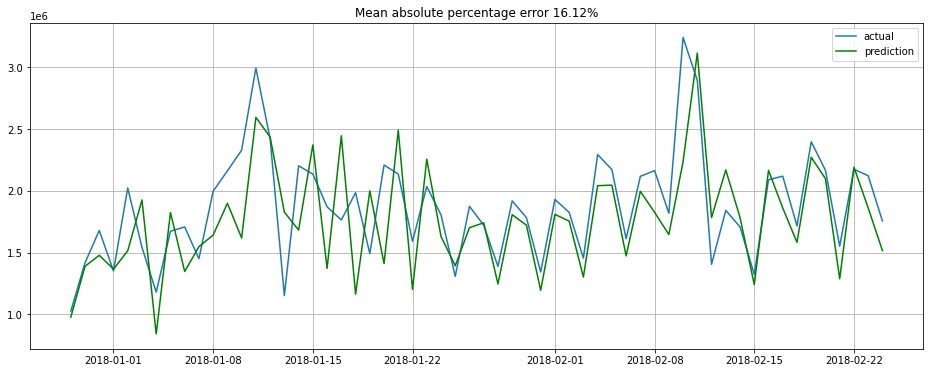

In [23]:
plot_actual_and_prediction(test_y, lr_predictions)

In [24]:
lr.coef_

array([-2.01730935e+04,  6.41210894e+03,  7.36398844e+03,  1.26950281e+04,
        6.79825348e+04,  4.04387741e+03, -1.86177021e+03, -1.32246340e+04,
        1.87980728e+03, -2.45231617e+02, -3.66413495e+03,  1.31903852e+04,
        3.77840466e+05, -2.65307196e+05,  2.98656868e+05, -2.64115036e+05,
        1.84056165e+05, -8.15728156e+04,  4.95721503e+04, -5.30808013e+04,
        1.12422893e+05, -1.01738826e+05,  4.54000099e+04,  3.63504234e+04,
       -6.46518878e+04,  6.52050413e+04])

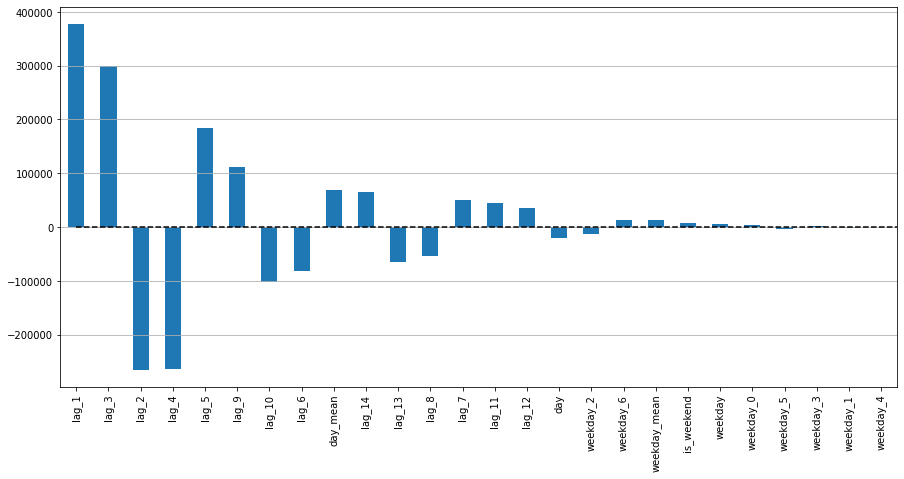

In [25]:
# Features importance
coefs = pd.DataFrame(lr.coef_, train_X.columns)
coefs.columns = ["coef"]
coefs["abs"] = coefs.coef.apply(np.abs)
coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

plt.figure(figsize=(15, 7))
coefs.coef.plot(kind='bar')
plt.grid(True, axis='y')
plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

## Remove Insignificant Features

In [26]:
important_features = coefs[:-10]

In [27]:
currency_features2 = currency_features[list(important_features.index) + ['y']]
currency_features2.head()

,lag_1,lag_3,lag_2,lag_4,lag_5,lag_9,lag_10,lag_6,day_mean,lag_14,lag_13,lag_8,lag_7,lag_11,lag_12,day,y
Time,,,,,,,,,,,,,,,,,
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1266254.4,NaN,NaN,NaN,NaN,NaN,NaN,1,1199436
2017-05-02,1199436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1209799.7,NaN,NaN,NaN,NaN,NaN,NaN,2,1045515
2017-05-03,1045515.0,NaN,1199436.0,NaN,NaN,NaN,NaN,NaN,1205868.0,NaN,NaN,NaN,NaN,NaN,NaN,3,586111
2017-05-04,586111.0,1199436.0,1045515.0,NaN,NaN,NaN,NaN,NaN,1291442.2,NaN,NaN,NaN,NaN,NaN,NaN,4,856601
2017-05-05,856601.0,1045515.0,586111.0,1199436.0,NaN,NaN,NaN,NaN,1252058.9,NaN,NaN,NaN,NaN,NaN,NaN,5,793775


In [28]:
y = currency_features2.dropna()['y']
X = currency_features2.dropna().drop(['y'], axis=1)

# reserve 20% of data for testing
train_X, test_X, train_y, test_y = timeseries_train_test_split(X, y, test_size=0.2)

In [29]:
scaler = StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [30]:
lr = LinearRegression()
lr.fit(train_X_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr_predictions = lr.predict(test_X_scaled)

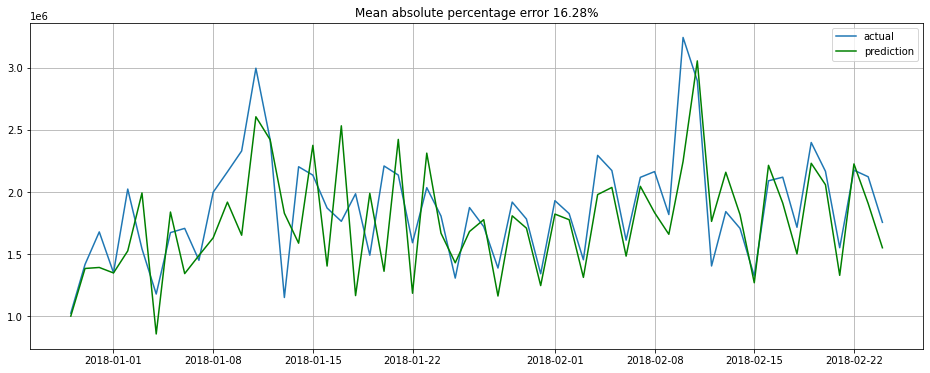

In [32]:
plot_actual_and_prediction(test_y, lr_predictions)

In [33]:
from sklearn.linear_model import LassoCV, RidgeCV

lasso = LassoCV()
lasso.fit(train_X_scaled, train_y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
lasso_predictions = lasso.predict(test_X_scaled)

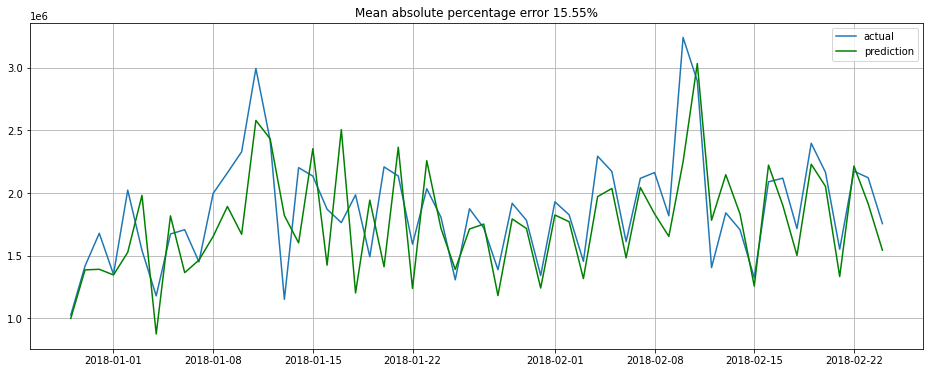

In [36]:
plot_actual_and_prediction(test_y, lasso_predictions)

# Time Series Cross Validation

In [43]:
from sklearn.model_selection import TimeSeriesSplit

ts_splits = TimeSeriesSplit(n_splits=5)

In [49]:
ts_splits.split(X, y)

<generator object TimeSeriesSplit.split at 0x7f60982d1830>

In [64]:
errors = []

currency_features2 = currency_features2.dropna()
for train, test in ts_splits.split(currency_features2):
    
    current_train_set = currency_features2.iloc[train]
    current_test_set = currency_features2.iloc[test]
    
    train_y = current_train_set['y']
    train_X = current_train_set.drop(['y'], axis=1)
    
    test_y = current_test_set['y']
    test_X = current_test_set.drop(['y'], axis=1)
    
    
    scaler = StandardScaler().fit(train_X)
    train_X_scaled = scaler.transform(train_X)
    test_X_scaled = scaler.transform(test_X)
    
    lr = LinearRegression()
    lr.fit(train_X_scaled, train_y)
    lr_predictions = lr.predict(test_X_scaled)
    
    error = mean_absolute_percentage_error(lr_predictions, test_y.values)
    errors.append(error)
    
    print('train length: {}, test length: {}, error: {}'.format(len(train), len(test), error))
    
print('average error: ', np.mean(errors))

train length: 51, test length: 47, error: 13.97951464391944
train length: 98, test length: 47, error: 11.758565424130971
train length: 145, test length: 47, error: 9.764490869836536
train length: 192, test length: 47, error: 12.549616333753002
train length: 239, test length: 47, error: 13.698319947561895
average error:  12.350101443840368
